In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize
print(tf.__version__)

2.3.0


In [2]:
model = tf.keras.models.load_model('../model/first_model')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 32, 32, 128)       1

In [38]:
test_img = imread('test.jpg')
print(test_img.shape)
test_img = resize(test_img, output_shape=(256, 256, 3), preserve_range=True)
test_img /= 255
print(test_img.shape)

(960, 960, 3)
(256, 256, 3)


In [42]:
x_data = np.empty((1, 256, 256, 3), dtype=np.float32)
x_data[0] = test_img

In [62]:
preds = model.predict(x_data)

In [63]:
preds.shape

(1, 256, 256, 1)

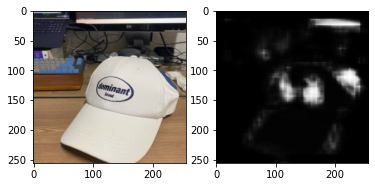

In [64]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(x_data[0].squeeze(), cmap='gray')
ax[1].imshow(preds[0].squeeze(), cmap='gray')